In [277]:
import scipy as scipy
import seaborn as sb
import pandas as pd
import numpy as np
import  matplotlib as mat

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ace-class-assignment/Test.csv
/kaggle/input/ace-class-assignment/AMP_TrainSet.csv


In [ ]:
import warnings 
warnings.filterwarnings('ignore')

# **Step** **1**
****So after running this cell am expecting to see the versions of the imported libraries and if installed , they will run without any error.
Numpy- gives us the N-dimensional array object, broadcasting functions , linear algebra and random number capabilities
Matplot- Plots and histograms , bar charts , scatterplots( for visualizatio of our dataset)
Pandas- powerful data structure since we are dealing with dataframes,handling of data.

In [278]:
#load the libraries we will use during the algorithn
from pandas import read_csv# to be able to read our csv files into our space
from pandas.plotting import scatter_matrix# is used in the visualization(multivarites)
from matplotlib import pyplot# to show our different plots after we have plotted them , eg histograms
from sklearn.model_selection import train_test_split# thsi is for spliting our data when we want to get the best model , into train and validate
from sklearn.model_selection import cross_val_score#is used to access the predictive performance of the models and to judge how they perform to the test data.When we fit a model we fit it into training dataset
from sklearn.model_selection import StratifiedKFold# its a cross validation, selection of folds so that the mean response value is approx equal in all folds
from sklearn.metrics import classification_report# so here we get to get the precision,F1 and the scores for that model, True negatives and False negatives are used to create the classification report
from sklearn.metrics import confusion_matrix#A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.
from sklearn.metrics import accuracy_score#accuracy is the fraction of predictions our model got right.
from sklearn.feature_selection import SelectKBest#for feature selection 
from sklearn.feature_selection import chi2# for feature selection
from sklearn.feature_selection import f_classif# for feature selection
 

In [279]:
from sklearn.metrics import matthews_corrcoef as mcc
#from sklearn.metrics import matthews_corrcoef

The Matthews Correlation Coefficient (MCC) has a range of -1 to 1 where -1 indicates a completely wrong binary classifier while 1 indicates a completely correct binary classifier. Using the MCC allows one to gauge how well their classification model/function is performing.So a good one will have a number close to 1

# **STEP 2**


**So what i have tried to do is to import every function i think i will need with all the classification models that i will use , i will later explain the significance and why am using that model when i have runned them**

In [280]:
TRAIN=pd.read_csv('../input/ace-class-assignment/AMP_TrainSet.csv')#importing the data into our workspace
print(TRAIN)

      FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  FULL_DAYM780201  \
0             5.0               0.000            0.951           74.842   
1             4.0               5.405            0.931           71.595   
2             5.5               5.405            0.873           73.595   
3             5.0               4.167            0.895           66.250   
4             7.5               8.537            0.932           64.720   
...           ...                 ...              ...              ...   
3033          1.0               5.263            0.945           67.947   
3034         -6.5              21.667            1.133           75.433   
3035         -1.5              12.500            1.091           76.542   
3036          2.0               5.000            0.849           73.750   
3037         -1.0              15.789            1.066           66.158   

      FULL_GEOR030101  FULL_OOBM850104  NT_EFC195  AS_MeanAmphiMoment  \
0               0.975     

# **STEP** **3**


****So after here my train data should be here and i get to know it and visialize as follows.In the variable TRAIN

In [281]:
#Getting to know my data
print(TRAIN.shape)# getting to know many rows and columns does our dataset has 
print(TRAIN.describe())# getting to know some statistics , mean , average,median ,max and min value for each attribute in our data
print(TRAIN.head(20))#get the first 20 records for our dataset , just to know
print(TRAIN.groupby('CLASS').size())# getting to group our dataset by the number of Classes it has and to get how mnay members does each class has.
TRAIN.columns

(3038, 12)
       FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  FULL_DAYM780201  \
count  3038.000000         3038.000000      3038.000000      3038.000000   
mean      2.060237            8.521520         0.971410        73.668760   
std       3.819929            7.586652         0.107413         8.527489   
min     -16.000000            0.000000         0.684000        42.750000   
25%       0.000000            2.516000         0.895000        68.294000   
50%       2.000000            7.143000         0.963000        74.059500   
75%       4.000000           13.158000         1.041000        79.343750   
max      30.000000           46.667000         1.451000       101.682000   

       FULL_GEOR030101  FULL_OOBM850104    NT_EFC195  AS_MeanAmphiMoment  \
count      3038.000000      3038.000000  3038.000000         3038.000000   
mean          0.994007        -2.432927     0.088545           15.683233   
std           0.031333         1.707223     0.284133           11.575665   


Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

So in the last code showing us the CLASS , i can tell that my classes are the same , so that wont bias my algorithm , so no need for smote to increase one class or decrease it so it may be equal , so here is the same .
And also i ahve viewd my column names to checl if didnt thy repeat any column name .

# **STEP** **4**


**So from the above output we have 3038 rows and 12 columns.And even the statistics showing that our minimum value is 0 and our maximaum value is 103.167000*. Th classes we have two since its a classification model which are 0 and 1 , we have 1519 zeros and 1519 ones and in total they make the 3038 *
****

# STEP 5

In [282]:
#Data visualization



** ******DATA VISUALIZATION**
So we what we do is to view our data into two dimensions
****Univariate plots to better understand each attribute.What am hoping to see here is more like the statistics, the mean , upper and lower quatile for each attribute in our dataset. This will also help us see how the data is distributed for that attribute, is it normal , is it skewed
Multivariate plots to better understand the relationships between attributes.It will help us see which ones are correlated and which one are not , so for our model we will like to have the correlated ones.

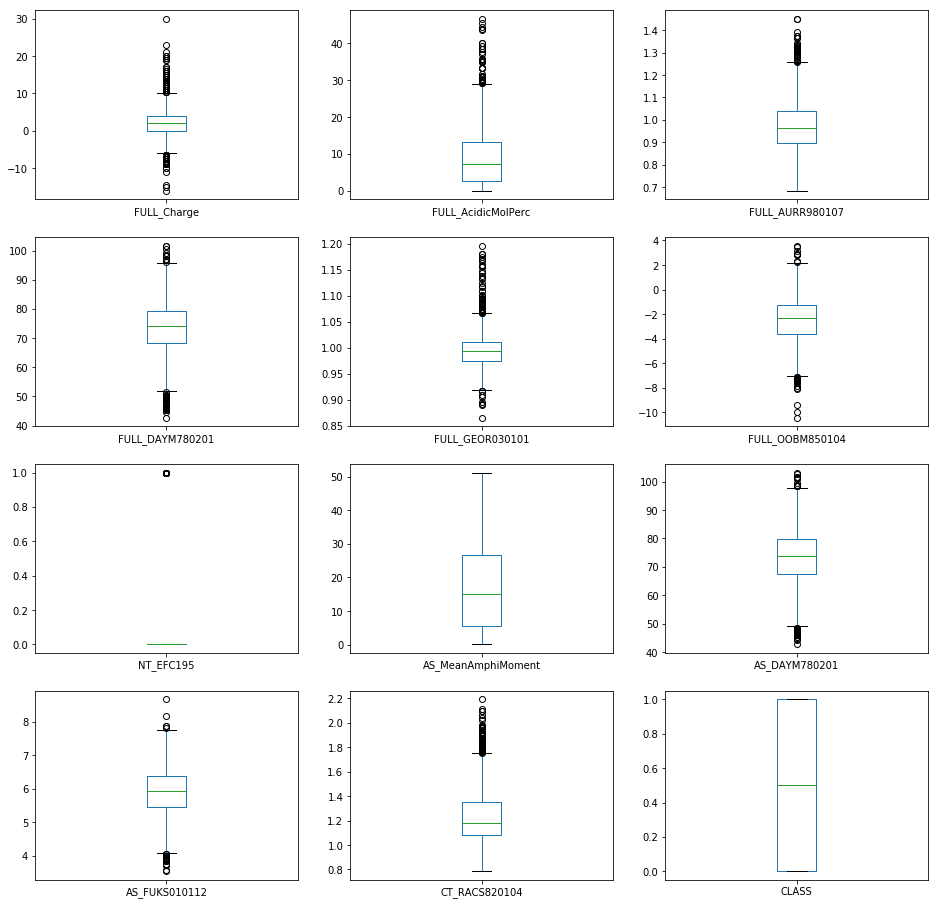

In [283]:
#Univariate Plots- one attribute(we shal use the box and whisker)
TRAIN.plot(kind='box',subplots=True, layout=(4,3), sharex=False, sharey=False , figsize=(16,16))
pyplot.show()


****So in this code am expecting to see the statistics of each attribute independent. This will give us the mean and which is the middle line and the upper and lower quatile,It is often used in explanatory data analysis. This type of graph is used to show the shape of the distribution, its central value, and its variability.

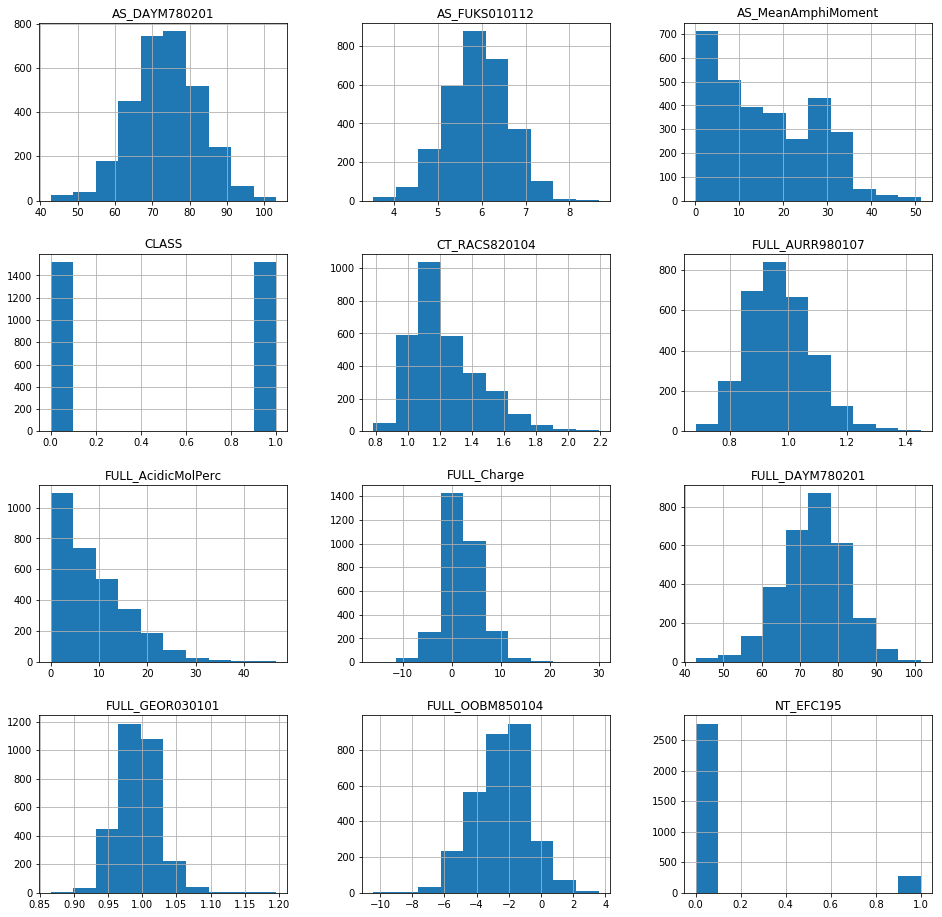

In [284]:
#we shall use also the histogram
TRAIN.hist(figsize=(16,16))
pyplot.show()

**So this is another way of showing the distribution, we can see that AS_DAYM780201,AS_FUKS010112 and many attributes are normal distributed **
This is to tell us which of the attributes should be used for the algorithm.

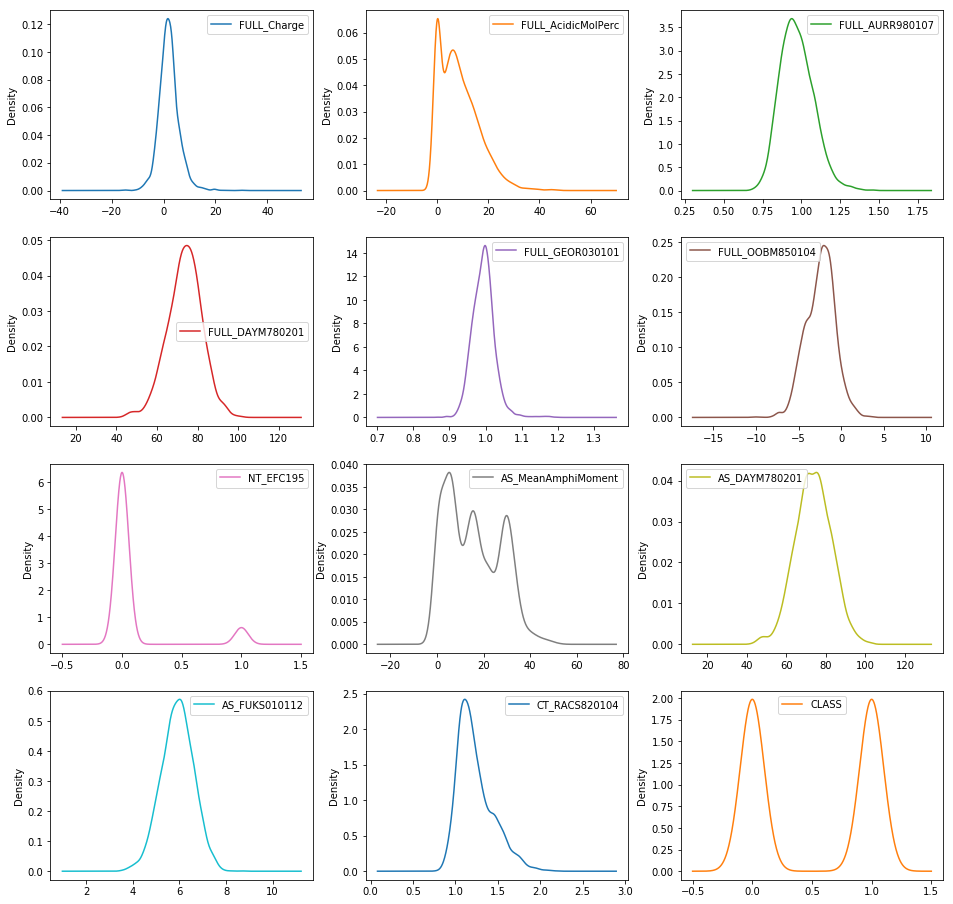

In [285]:
TRAIN.plot(kind='density',subplots=True, layout=(4,3), sharex=False, sharey=False,figsize=(16,16))
pyplot.show()

*****We can see clearly the distribution of the attributes , those that are normal distributed and those that are not normally distributed*

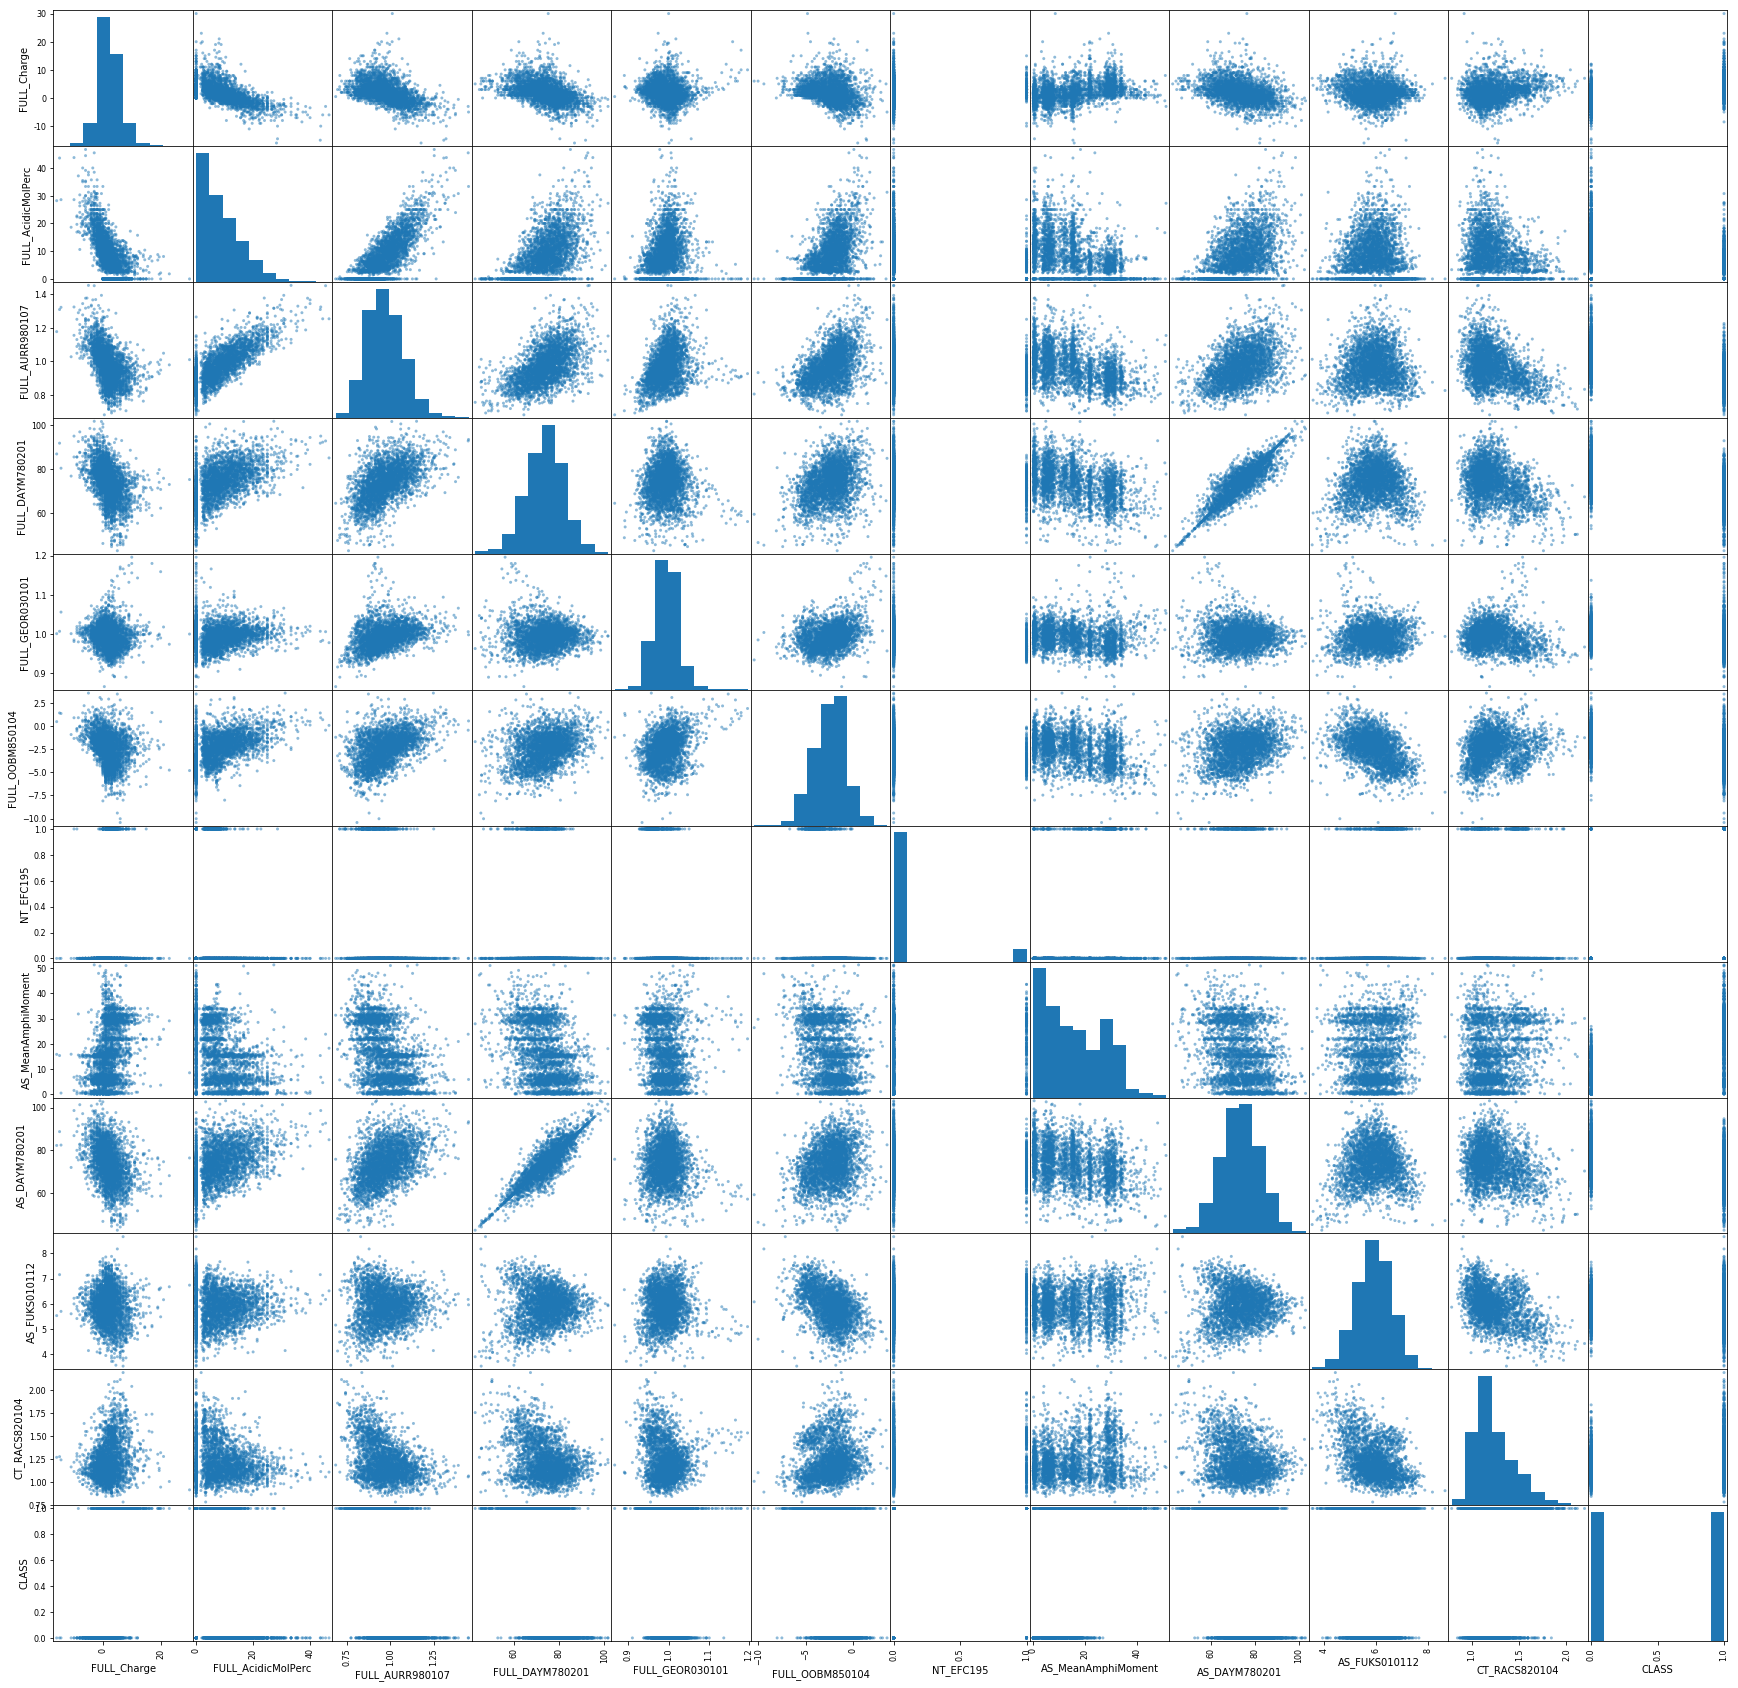

In [286]:
#multivariate plots- as mentioned ealier we will see the relationship amnong the attributes, so here we will consider
#scatter plot matrix
scatter_matrix(TRAIN, figsize=(30,30))
pyplot.show() #the diagonal distribution(comparing itseld against itself) is some which suggest a high correlation and a predictable realtion. as this one goes up , also this one goes up or down.

So here this tells me about the correlation of one attribute against the other, so somr do have correlation and others dont hence this telles me that if they are correlated , i dont have to have both attriutes i have to get rid ofb one , but i have a questioon here, WHY ARE WE HAVING HISTOGRAMS IN THE DIAGONALS and HOW DO WE EXPLAIN THIS LINES FOR EXAMPLE HERE , THE BOTTOM ROW ?

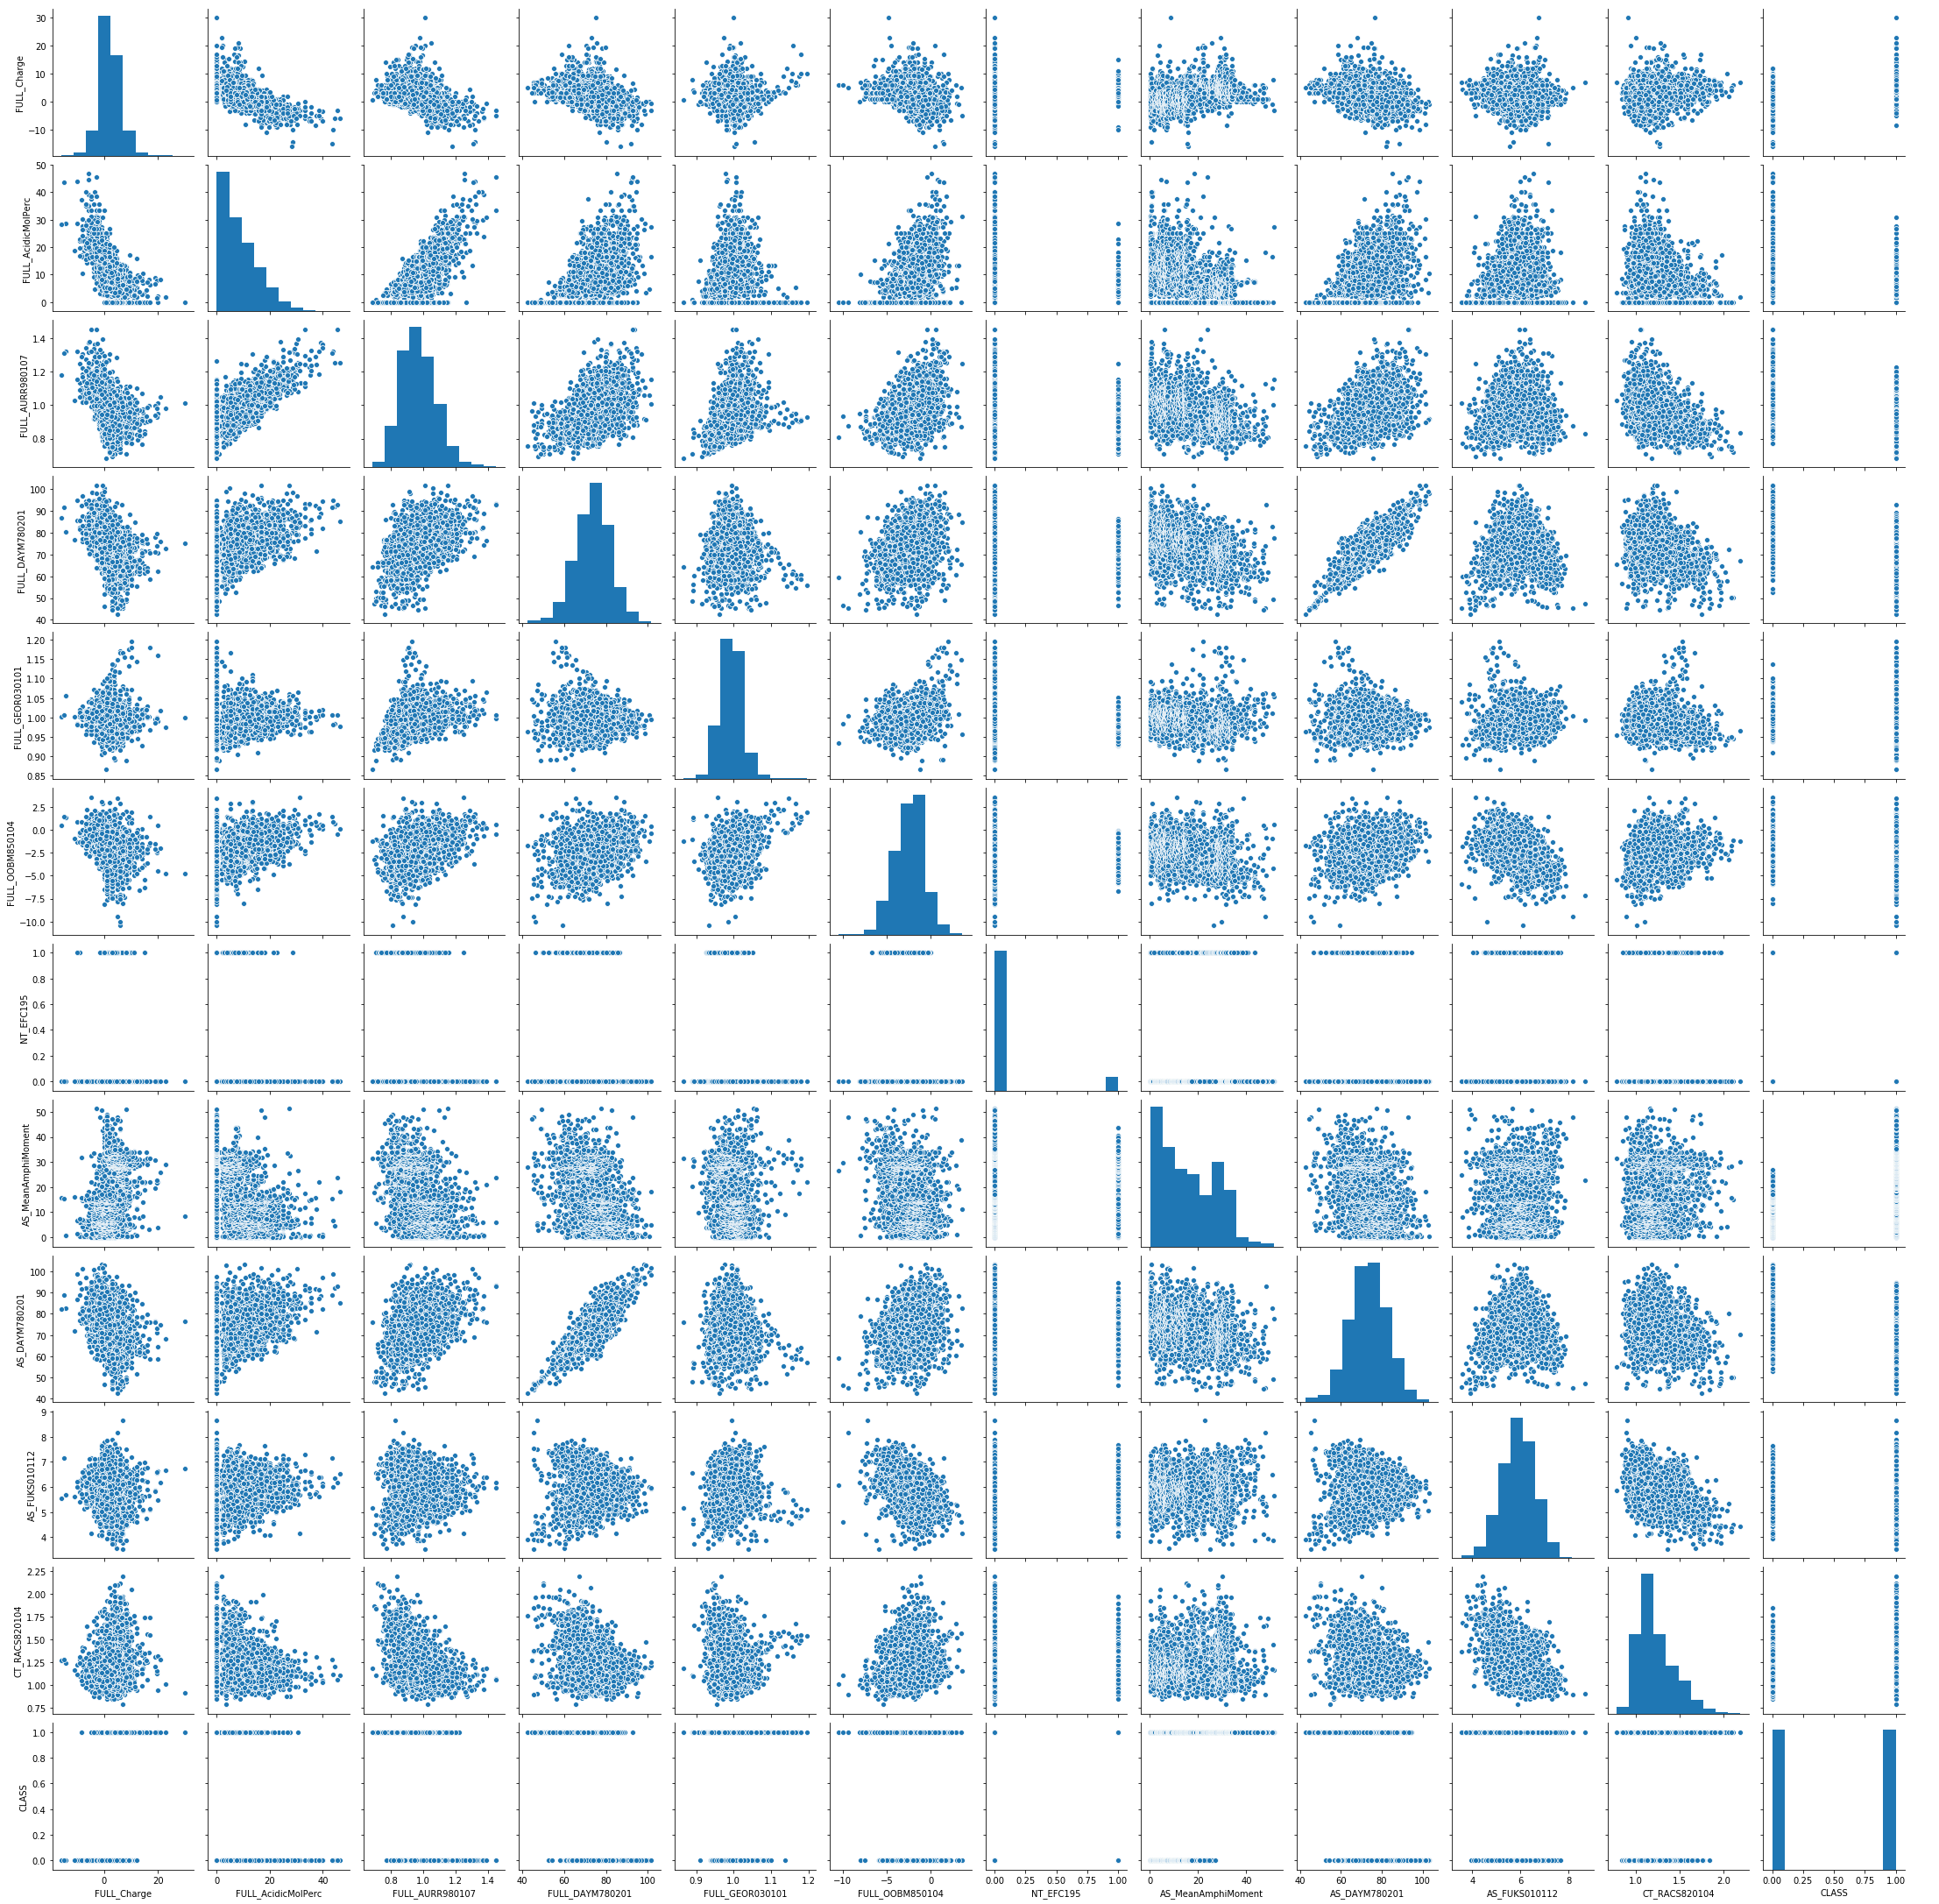

In [287]:
sb.pairplot(TRAIN)
pyplot.show()

So this is the scatter matrix for all the variables in our dataset. Scatter plots are useful for knowing structured relationships between variables, but its not yet clear , because i have used all the attributes

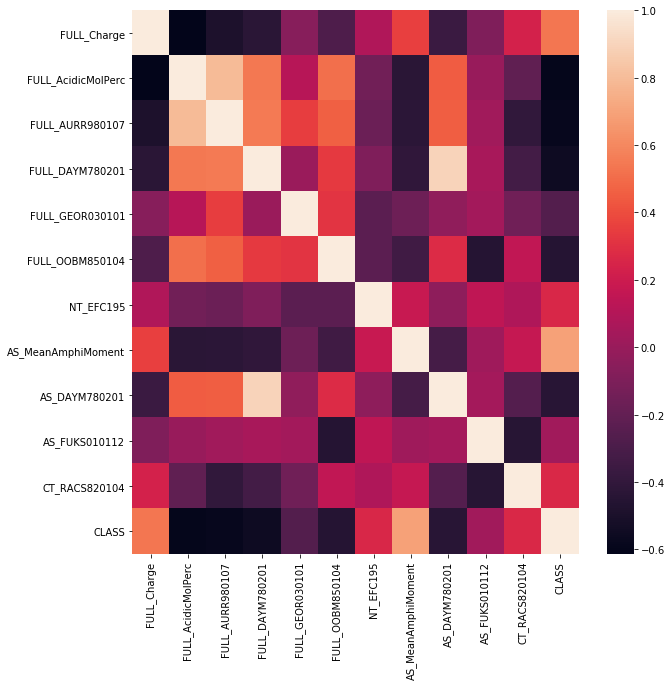

In [288]:
pyplot.figure(figsize=(10,10))
sb.heatmap(TRAIN.corr(method='pearson'))

So above i have found the correlation of the attributes , you know why they  are important ? Because when i find two features that are correlated , i have to get rid of one feauture in order to increase the accuarcy and the speed of my algorithm. But i did the IRIS dataset and as i saw other attributes being dropped , both of them , i dont know didnt we take one instead of dropping all???So some are positivey correlated , while others are negative correlated, that tells us that we have to either deal wi

In [289]:
TRAIN.corr(method="pearson")

FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  \
FULL_Charge            1.000000           -0.612996        -0.490977   
FULL_AcidicMolPerc    -0.612996            1.000000         0.794796   
FULL_AURR980107       -0.490977            0.794796         1.000000   
FULL_DAYM780201       -0.434603            0.541481         0.548253   
FULL_GEOR030101       -0.058725            0.115201         0.346139   
FULL_OOBM850104       -0.283758            0.513344         0.462712   
NT_EFC195              0.088068           -0.143168        -0.169540   
AS_MeanAmphiMoment     0.355477           -0.431590        -0.426097   
AS_DAYM780201         -0.365374            0.449621         0.456260   
AS_FUKS010112         -0.090570            0.002334         0.032958   
CT_RACS820104          0.232929           -0.213543        -0.403599   
CLASS                  0.534602           -0.598816        -0.584111   

                    FULL_DAYM780201  FULL_GEOR030101  FULL_OOBM850104  \
FULL_Charge               -0.434603        -0.058725        -0.283758   
FULL_AcidicMolPerc         0.541481         0.115201         0.513344   
FULL_AURR980107            0.548253         0.346139         0.462712   
FULL_DAYM780201            1.000000         0.010118         0.334778   
FULL_GEOR030101            0.010118         1.000000         0.319157   
FULL_OOBM850104            0.334778         0.319157         1.000000   
NT_EFC195                 -0.090058        -0.230417        -0.230561   
AS_MeanAmphiMoment        -0.408793        -0.160269        -0.336297   
AS_DAYM780201              0.894191        -0.029085         0.275640   
AS_FUKS010112              0.055915         0.040480        -0.452769   
CT_RACS820104             -0.326792        -0.151935         0.155304   
CLASS                     -0.554838        -0.260470        -0.453287   

                    NT_EFC195  AS_MeanAmphiMoment  AS_DAYM780201  \
FULL_Charge          0.088068            0.355477      -0.365374   
FULL_AcidicMolPerc  -0.143168           -0.431590       0.449621   
FULL_AURR980107     -0.169540           -0.426097       0.456260   
FULL_DAYM780201     -0.090058           -0.408793       0.894191   
FULL_GEOR030101     -0.230417           -0.160269      -0.029085   
FULL_OOBM850104     -0.230561           -0.336297       0.275640   
NT_EFC195            1.000000            0.178683      -0.036844   
AS_MeanAmphiMoment   0.178683            1.000000      -0.322378   
AS_DAYM780201       -0.036844           -0.322378       1.000000   
AS_FUKS010112        0.145924            0.025580       0.045562   
CT_RACS820104        0.080898            0.171524      -0.256060   
CLASS                0.260702            0.693552      -0.437168   

                    AS_FUKS010112  CT_RACS820104     CLASS  
FULL_Charge             -0.090570       0.232929  0.534602  
FULL_AcidicMolPerc       0.002334      -0.213543 -0.598816  
FULL_AURR980107          0.032958      -0.403599 -0.584111  
FULL_DAYM780201          0.055915      -0.326792 -0.554838  
FULL_GEOR030101          0.040480      -0.151935 -0.260470  
FULL_OOBM850104         -0.452769       0.155304 -0.453287  
NT_EFC195                0.145924       0.080898  0.260702  
AS_MeanAmphiMoment       0.025580       0.171524  0.693552  
AS_DAYM780201            0.045562      -0.256060 -0.437168  
AS_FUKS010112            1.000000      -0.445284  0.033432  
CT_RACS820104           -0.445284       1.000000  0.267652  
CLASS                    0.033432       0.267652  1.000000

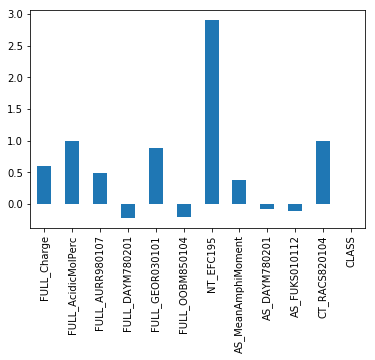

In [290]:
#Skew of Univariate Distribution
TRAIN.skew().plot(kind='bar')

**Working with skewed data is not good for an algorithm so here we find out how is the data skewed. So after that when i have seen how much skewness , i will know which attributes to apply the skewness solving , maybe cube root and square root for those that are positively skewd. 
So my data  , i can see some that are negatively skewed , but provided the features are important for my algorithm , if they are not , i will drop them** So hence i will have to solve them before i continue.

In [291]:
#Evaluate some algorithms-- create some models of the data and estimate thier accuracy on unseen data
#Steps
#1.Separate validation dataset
#2.Set up test harness to use 10.fold cross validation
#3.Build multiple models to predict species from flower measurements
#4.Select the best model


#Create a validation Dataset- to see if the model we created is good, and later try statistical methods to estimate the accuracy of the models we created on unseen data.
#and also estimate accuracy of the best model on unseen data by evaluating it on unseen data, hence we shall hold some of the data that the alsorithm will not see , so we will use this data for an independent idea of how accurate our model is
#so split it into 80% which we will tra our models with then 20% which we shall test with(validation dataset)

# **STEP** **7**


# Splitting the TRAIN data into Train and validate , so here we will train our moe on the train set and then validate it on the Validate set to see if is it that accurate or not.

In [292]:
array= TRAIN.values# this is are the values of the dataset that will be used in the training
X= array[:,0:11]# so here we want all our columns to be included in the training and validation
y=array[:,11] # our training will be based on the last column which is in this case is the "variety" column (our class(as represented in WEKA ) or its our label)
X_train, X_validation, Y_train, Y_validation= train_test_split(X, y, test_size=0.2, random_state=2)# so here we now now spliting using the function (train_test_split),
#test size is the size of our validation which is 20% and 80% of the training, then the random _state to mantain the same values through out, if you remove it , your algorithm will be confused because its tested on dfferent

So what i have  done here is to split my validate and train data as needed for the train data so now i will have to run on the validate set and as seen here this are the lenghts of the data  that will be used as explained in the comments.

In [293]:
#xtrain
print(X_train)# this the 80% of train
print(len(X_train))
#ytarin
print(Y_train)#80% for the validation
print(len(Y_train))
#y vali
print(Y_validation)#20% for the validation(labels)
print(len(Y_validation))
#xvali
print(X_validation)#20% for the validation
print(len(X_validation))

[[ 3.5    0.     0.908 ... 59.222  5.789  1.141]
 [ 2.     6.452  0.957 ... 64.611  6.278  1.103]
 [ 5.     9.091  1.075 ... 77.944  4.813  1.148]
 ...
 [ 6.5    0.     0.944 ... 82.333  5.163  1.118]
 [-1.    15.     1.049 ... 82.667  6.166  1.088]
 [ 4.    10.619  0.974 ... 75.944  5.562  1.041]]
2430
[1. 0. 1. ... 0. 0. 0.]
2430
[1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 1.

As seen from the output, these are the lengths and the values for both the test and validate sets.

# Step 8
Importing the models to be used on the algorithm from sklearn

In [294]:
#These are the classifications models to be used, they are explained briefly below
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier



1. KNeighbourClassifiers
it takes a bunch of labelled points and uses them to learn how to label other points. To label a new point, it looks at the labelled points closest to that new point (those are its nearest neighbors), and has those neighbors vote, so whichever label the most of the neighbors have is the label for the new point (the “k” is the number of neighbors it checks).
2. Logistic Regression
It is a statistical method for analysing a data set in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). The goal of logistic regression is to find the best fitting model to describe the relationship between the dichotomous characteristic of interest (dependent variable = response or outcome variable) and a set of independent (predictor or explanatory) variables
3. Decision Tree Classifier
It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes
4. Linear Discriminant Analysis
works by reducing the dimensionality of the dataset, projecting all of the data points onto a line. Then it combines these points into classes based on their distance from a chosen point or centroid.
5. Support Vector Machines
work by drawing a line between the different clusters of data points to group them into classes. Points on one side of the line will be one class and points on the other side belong to another class.
6. A Naive Bayes Classifier 
determines the probability that an example belongs to some class, calculating the probability that an event will occur given that some input event has occurred
7. RandomForest
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree

8. SGDClassifier
Stochastic Gradient Descent (sgd) is a solver. It is a simple and efficient approach for discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression
9. MLPClassifier
A multilayer perceptron (MLP) is a feedforward artificial neural network model that maps sets of input data onto a set of appropriate outputs
10. Nearest Centroid Classifier
is a classification model that assigns to observations the label of the class of training samples whose mean (centroid) is closest to the observation

# Step 9
Training each model on our set in order to see which one is suiatble for our case

In [295]:
#testing all the models at once and taking tthe one with a higher mean and the lowest standard deviation
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RTC', RandomForestClassifier()))
models.append(('SGD',SGDClassifier()))
models.append(('NC', NearestCentroid()))
models.append(('MLPC',MLPClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=30, random_state=10, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean()*100, cv_results.std()))

LR: 92.057613 (0.030688)
LDA: 92.222222 (0.037194)
KNN: 90.123457 (0.034332)
CART: 90.452675 (0.027036)
NB: 92.139918 (0.024995)
SVM: 88.724280 (0.033845)
RTC: 93.950617 (0.027486)
SGD: 88.024691 (0.065881)
NC: 89.794239 (0.033422)


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPC: 92.304527 (0.030522)


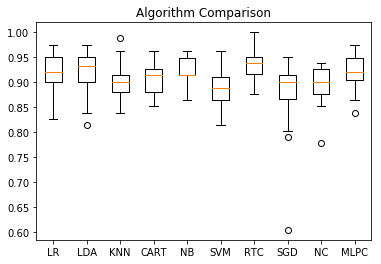

In [296]:
#comparing the algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [297]:

#make predictions on the validated dataset
model= GaussianNB()
y=model.fit(X_train, Y_train)
predictions= model.predict(X_validation)


In [298]:
from sklearn.metrics import matthews_corrcoef as mcc
model.fit(X_validation,Y_validation)
mcc=mcc(model.predict(X_validation),Y_validation)
print("MCC:",mcc)


MCC: 0.8321868706262611


Here i have tried to determine the MCC for the GaussianNB model and from the output i can tell that its a good one since its close to 1 , which amakes it a good classifier

In [299]:
#evaluating predictions - comparion them to the expected results in the validation set, then calculate classificationn accuracy , as well as a confusion matrix and a classification report
#Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9111842105263158
[[280  29]
 [ 25 274]]
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       309
         1.0       0.90      0.92      0.91       299

    accuracy                           0.91       608
   macro avg       0.91      0.91      0.91       608
weighted avg       0.91      0.91      0.91       608



This is the validation step , where we check for the results of the model we choose to be most accurate than the others, we check it on the validation dataset before we go to th e test dataset.

In [300]:
Test=pd.read_csv("../input/ace-class-assignment/Test.csv")
Test.head()

FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  FULL_DAYM780201  \
0          4.0               3.704            0.873           73.519   
1          4.0               4.444            0.892           62.444   
2          2.0               0.000            0.901           47.000   
3          4.5               0.000            0.869           69.222   
4         -4.0              21.591            1.061           71.682   

   FULL_GEOR030101  FULL_OOBM850104  NT_EFC195  AS_MeanAmphiMoment  \
0            0.987           -4.833          0               0.382   
1            0.931           -0.584          0               0.320   
2            1.039           -5.664          0               0.164   
3            0.982           -5.423          0               2.010   
4            0.976           -2.002          0               2.758   

   AS_DAYM780201  AS_FUKS010112  CT_RACS820104  
0         74.556          7.225          1.234  
1         56.056          4.942          1.853  
2         47.000          5.969          1.174  
3         69.222          5.462          1.138  
4         66.000          5.582          1.453

In [301]:
Test.shape
TRAIN.shape

(3038, 12)

In [302]:
Y=TRAIN.CLASS
X=TRAIN.drop("CLASS",axis=1)
OUTPUT=model.fit(X, Y).predict(Test.values)
OUTPUT_1=pd.DataFrame(OUTPUT)
OUTPUT_1.columns=["CLASS"]
OUTPUT_1.index.name="Index"
OUTPUT_1["CLASS"]=OUTPUT_1["CLASS"].map({0.0:False,1.0:True})
OUTPUT_1.to_csv("NB")
print(OUTPUT_1["CLASS"].unique())
print(OUTPUT_1["CLASS"].nunique())
print(OUTPUT_1.groupby("CLASS").size()[0].sum())
print(OUTPUT_1.groupby("CLASS").size()[1].sum())



[ True False]
2
370
388


The Gaussian gave me a score of 99% and 100% , the Random Tree Classifier gave me 87% and the KNN model gave 82% hence the GuassianNB comes on top , when all the features are used for my model.

# THE END FOR WHEN I USED ALL THE FEATURES

In [303]:
###########################################So here am trying to use the selected features#############################################

In [304]:
#FEATURE SELCTION
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array= TRAIN.values
X = array[:,0:11]
Y = array[:,11]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 7)
fit = rfe.fit(X, Y)
print("Num Features: ",  fit.n_features_)
print("Selected Features:",  fit.support_)
print("Feature Ranking: ",  fit.ranking_)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Num Features:  7
Selected Features: [ True False  True False  True  True  True  True False False  True]
Feature Ranking:  [1 4 1 3 1 1 1 1 5 2 1]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [305]:
TRAIN.columns

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

In [306]:
New7=TRAIN.drop(['FULL_AcidicMolPerc','FULL_DAYM780201','AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104'],axis=1)
New7# The selected 7 new features according to thier importance

FULL_Charge  FULL_AURR980107  FULL_GEOR030101  FULL_OOBM850104  \
0             5.0            0.951            0.975           -3.663   
1             4.0            0.931            0.957           -4.011   
2             5.5            0.873            0.961           -2.512   
3             5.0            0.895            0.999           -1.362   
4             7.5            0.932            0.979           -2.091   
...           ...              ...              ...              ...   
3033          1.0            0.945            1.006           -2.151   
3034         -6.5            1.133            1.015           -1.675   
3035         -1.5            1.091            0.991           -0.918   
3036          2.0            0.849            1.017           -2.722   
3037         -1.0            1.066            0.998           -2.080   

      NT_EFC195  AS_MeanAmphiMoment  CLASS  
0             0               0.282      1  
1             1               0.600      1  
2             0               0.593      1  
3             0               0.614      1  
4             0               0.616      1  
...         ...                 ...    ...  
3033          0              16.706      0  
3034          0              16.897      0  
3035          0              16.918      0  
3036          0              17.131      0  
3037          0              17.151      0  

[3038 rows x 7 columns]

In [307]:
New7.shape# getting to know if have the columns been dropped

(3038, 7)

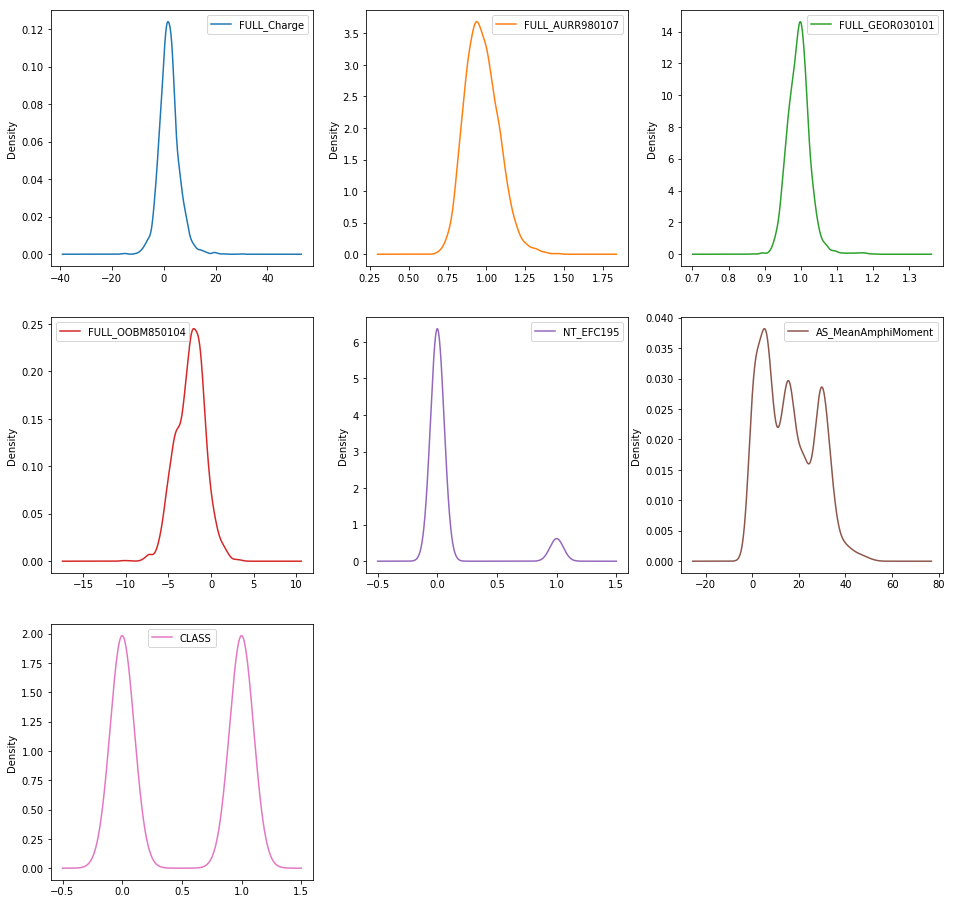

In [308]:
New7.plot(kind='density',subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=(16,16))
pyplot.show()# using the density plot to view thier distribution

Checking the distribution of the remaining characters , so i can tell from here that most of the attributes are normal distributed, so my algorithm wont deviate that much.


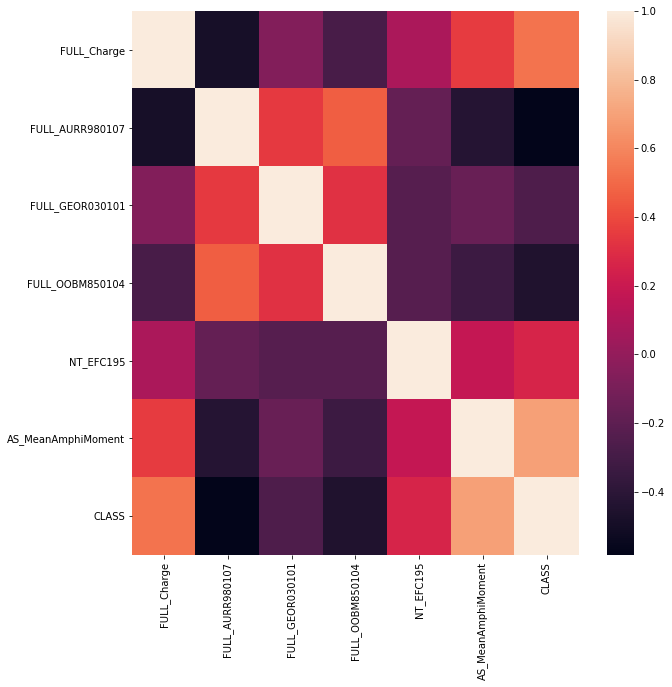

In [309]:
#So for the DATA VISUALIZATION of the selected attribute ,which are given as TRUES from the output above
pyplot.figure(figsize=(10,10))
sb.heatmap(New7.corr(method='pearson'))

In the correaltion plot as am still trying to decrease my attributes and to see which ones are correlated and which ones are not , so i can even continue drop them if its okay.

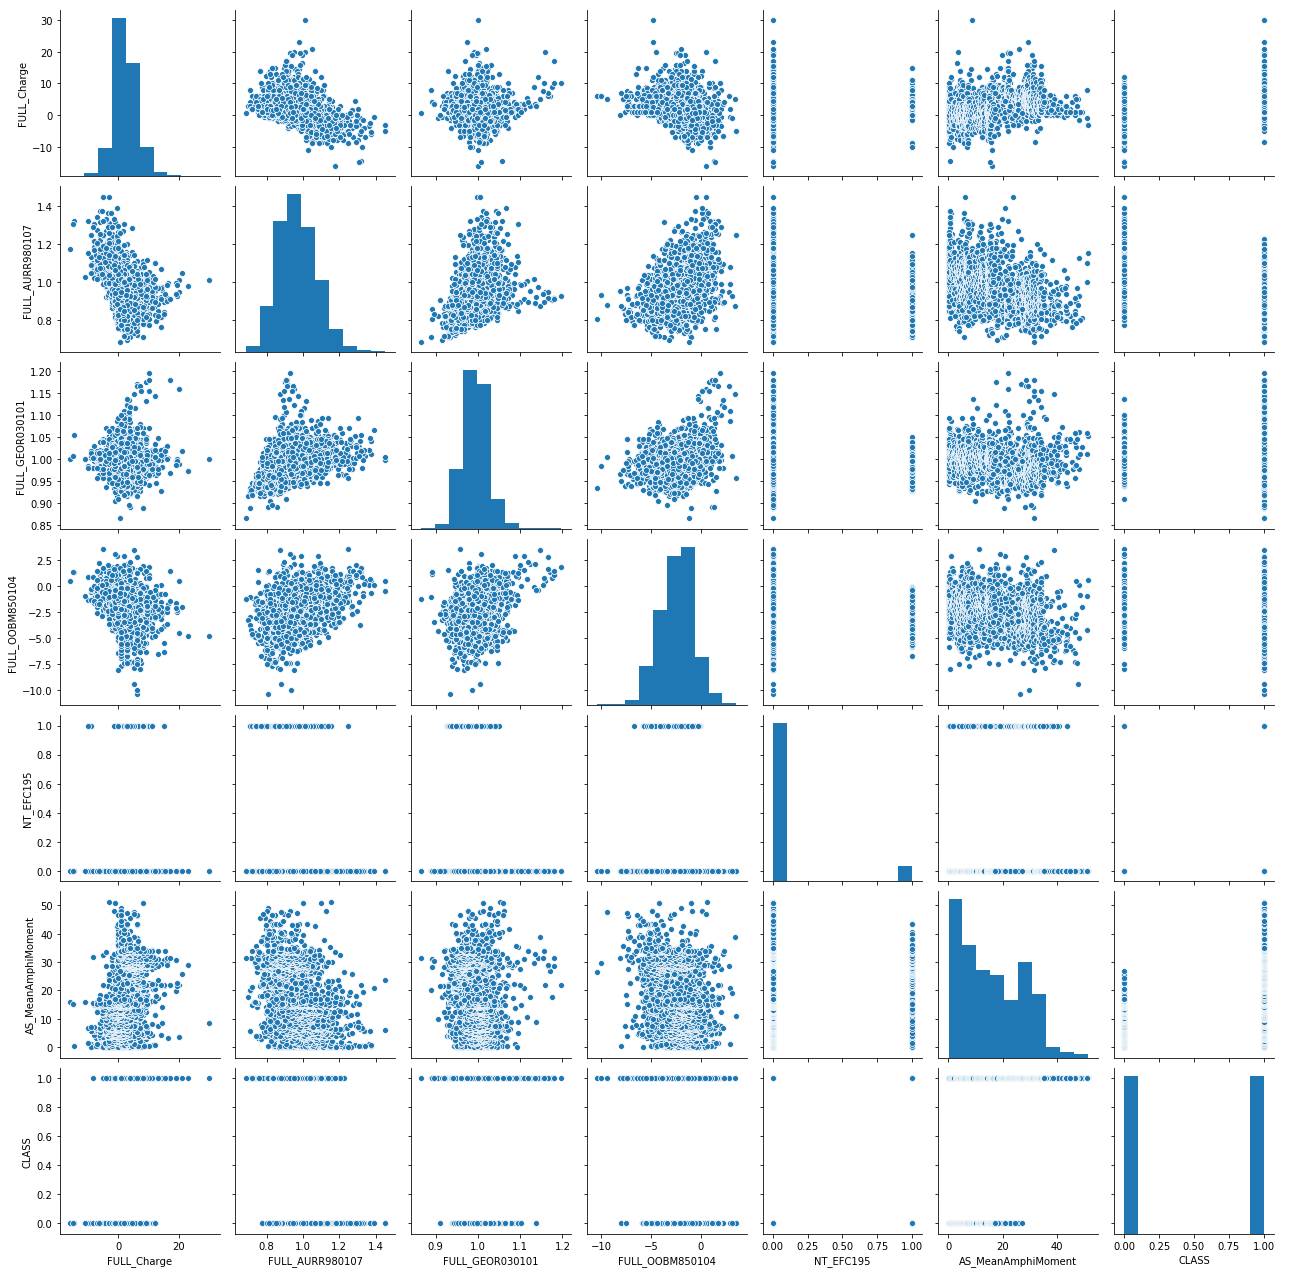

In [310]:
sb.pairplot(New7)
pyplot.show()

So now in the scatter platter i can tell the distribution too , but i dont know why am getting histograms for like when i plot an attributes agaisnt itself, shouldent i get maybe a line straight to show that its actually itself , so every poitn on the other side is found even on the other one? Also i can see that some attributes are not correlated with the other. 

In [311]:
#Data visualization- in order to find the correlation and the realtionship between the attributes , we shall do even the univariate and also the multivariate plots
#Univariate as mentioned above , we have saw how they are correlated in the multivariate plots so now we go try and see what we can get if we get a lower accuracy , we come back and drop again unt

In [312]:
array= New7.values# this is are the values of the dataset that will be used in the training
X= array[:,0:6]# so here we want all our columns to be included in the training and validation
y=array[:,6] # our training will be based on the last column which is in this case is the "variety" column (our class(as represented in WEKA ) or its our label)
X_train, X_validation, Y_train, Y_validation= train_test_split(X, y, test_size=0.2, random_state=2)# so here we now now spliting using the function (train_test_split),
#test size is the size of our validation which is 20% and 80% of the training, then the random _state to mantain the same values through out, if you remove it , your algorithm will be confused because its tested on dfferent

This is as seen before from when we have used all the features , spliting the data set , but now using the the new variable with the selected features.Am expecting to see reduced lenghth of this ones because i have reduced mydata set.

In [313]:
#xtrain
print(X_train)# this the 80% of train
print(len(X_train))
#ytarin
print(Y_train)#80% for the validation
print(len(Y_train))
#y vali
print(Y_validation)#20% for the validation(labels)
print(len(Y_validation))
#xvali
print(X_validation)#20% for the validation
print(len(X_validation))

[[ 3.5    0.908  1.053 -4.222  0.    22.111]
 [ 2.     0.957  0.974 -2.317  0.    15.615]
 [ 5.     1.075  1.007 -0.839  0.    22.314]
 ...
 [ 6.5    0.944  0.97  -1.945  0.     1.143]
 [-1.     1.049  1.008 -2.562  0.    10.098]
 [ 4.     0.974  0.991 -2.349  0.    10.914]]
2430
[1. 0. 1. ... 0. 0. 0.]
2430
[1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.

Checking the length and the values themselves. Yes they have reduced as compared to when i was having the whole dataset from the beginning.

In [314]:
#testing all the models at once and taking tthe one with a higher mean and the lowest standard deviation
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RTC', RandomForestClassifier()))
models.append(('SGD',SGDClassifier()))
models.append(('NC', NearestCentroid()))
models.append(('MLPC',MLPClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=35, random_state=10, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean()*100, cv_results.std()))

LR: 90.119491 (0.031095)
LDA: 90.157941 (0.032381)
KNN: 90.576161 (0.033772)
CART: 88.670216 (0.042391)
NB: 91.601301 (0.028891)
SVM: 91.892931 (0.032981)
RTC: 92.666075 (0.030125)
SGD: 84.980183 (0.055346)
NC: 86.371488 (0.038371)


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPC: 91.847974 (0.034616)


In [315]:
#make predictions on the validated dataset
model=GaussianNB()
y=model.fit(X_train, Y_train)
predictions= model.predict(X_validation)


In [316]:
from sklearn.metrics import matthews_corrcoef as mcc
model.fit(X_validation,Y_validation)
mcc=mcc(model.predict(X_validation),Y_validation)
print("MCC:",mcc)

MCC: 0.7998796301671613


Even here the MCC is 0.799 which is also close to one for the Gaussian

Since the GaussianNB model gave me the higest percentage , i will use it as my model in this dataset and also try maybe 2 or 3 other models

In [317]:
#evaluating predictions - comparion them to the expected results in the validation set, then calculate classificationn accuracy , as well as a confusion matrix and a classification report
#Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation,predictions))

0.8914473684210527
[[285  24]
 [ 42 257]]
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90       309
         1.0       0.91      0.86      0.89       299

    accuracy                           0.89       608
   macro avg       0.89      0.89      0.89       608
weighted avg       0.89      0.89      0.89       608



In [318]:
Test=pd.read_csv("../input/ace-class-assignment/Test.csv")
Test.head()

FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  FULL_DAYM780201  \
0          4.0               3.704            0.873           73.519   
1          4.0               4.444            0.892           62.444   
2          2.0               0.000            0.901           47.000   
3          4.5               0.000            0.869           69.222   
4         -4.0              21.591            1.061           71.682   

   FULL_GEOR030101  FULL_OOBM850104  NT_EFC195  AS_MeanAmphiMoment  \
0            0.987           -4.833          0               0.382   
1            0.931           -0.584          0               0.320   
2            1.039           -5.664          0               0.164   
3            0.982           -5.423          0               2.010   
4            0.976           -2.002          0               2.758   

   AS_DAYM780201  AS_FUKS010112  CT_RACS820104  
0         74.556          7.225          1.234  
1         56.056          4.942          1.853  
2         47.000          5.969          1.174  
3         69.222          5.462          1.138  
4         66.000          5.582          1.453

In [319]:

Test7=Test.drop(['FULL_AcidicMolPerc','FULL_DAYM780201','AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104'],axis=1)
Test7
Y=New7.CLASS
X=New7.drop("CLASS",axis=1)
OUTPUT=model.fit(X, Y).predict(Test7.values)
OUTPUT_1=pd.DataFrame(OUTPUT)
OUTPUT_1.columns=["CLASS"]
OUTPUT_1.index.name="Index"
OUTPUT_1["CLASS"]=OUTPUT_1["CLASS"].map({0.0:False,1.0:True})
OUTPUT_1.to_csv("SVC7")
print(OUTPUT_1["CLASS"].unique())
print(OUTPUT_1["CLASS"].nunique())
print(OUTPUT_1.groupby("CLASS").size()[0].sum())
print(OUTPUT_1.groupby("CLASS").size()[1].sum())

[ True False]
2
386
372


So in my scoring , i got 88% for the Naive Bayes model , and 82 % using Random Tree Classifier and 76% using the Support vector Machine , so hence the Gaussian NB model is also appearing to be suitable even when we selected the features , hebce its suitable for this type of problem , but let me do feature imporatnce and see .

# The end after RFE 

# USING FEATURE IMPORTANCE TO SEE TOO THEN WE CAN CONCLUDE AND SAY ITS GAUSSIANNB  

In [320]:
from sklearn.ensemble import ExtraTreesClassifier
array = TRAIN.values
X = array[:,0:11]
Y = array[:,-1]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)



[0.0797 0.1299 0.0909 0.093  0.0537 0.0726 0.0378 0.3003 0.0594 0.0329
 0.0498]


In [321]:
TRAIN.columns

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

In [322]:
Impo=TRAIN.drop([ 'FULL_GEOR030101', 'NT_EFC195', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104'],axis=1)
   
Impo# checking our new data with the selected features.

FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  FULL_DAYM780201  \
0             5.0               0.000            0.951           74.842   
1             4.0               5.405            0.931           71.595   
2             5.5               5.405            0.873           73.595   
3             5.0               4.167            0.895           66.250   
4             7.5               8.537            0.932           64.720   
...           ...                 ...              ...              ...   
3033          1.0               5.263            0.945           67.947   
3034         -6.5              21.667            1.133           75.433   
3035         -1.5              12.500            1.091           76.542   
3036          2.0               5.000            0.849           73.750   
3037         -1.0              15.789            1.066           66.158   

      FULL_OOBM850104  AS_MeanAmphiMoment  CLASS  
0              -3.663               0.282      1  
1              -4.011               0.600      1  
2              -2.512               0.593      1  
3              -1.362               0.614      1  
4              -2.091               0.616      1  
...               ...                 ...    ...  
3033           -2.151              16.706      0  
3034           -1.675              16.897      0  
3035           -0.918              16.918      0  
3036           -2.722              17.131      0  
3037           -2.080              17.151      0  

[3038 rows x 7 columns]

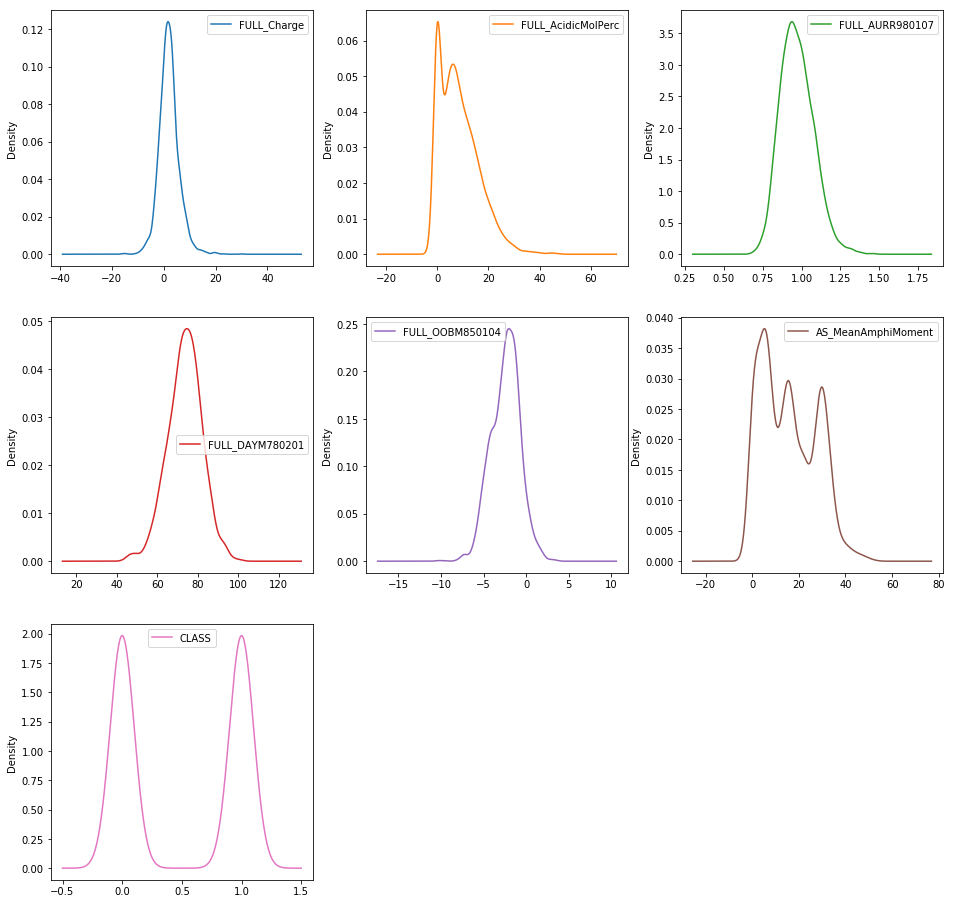

In [323]:
#Viewing our data
Impo.plot(kind='density',subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=(16,16))
pyplot.show()# using the density plot to view thier distribution

This is are our new attributes that are used , so i can tell most are normal distributed , but am noticing something about attribute number 8 , whenever i do selection , its always there, cant we use if only (if possible) because its clear thats the output or the end result is very much dependent on it .(just wondering though)

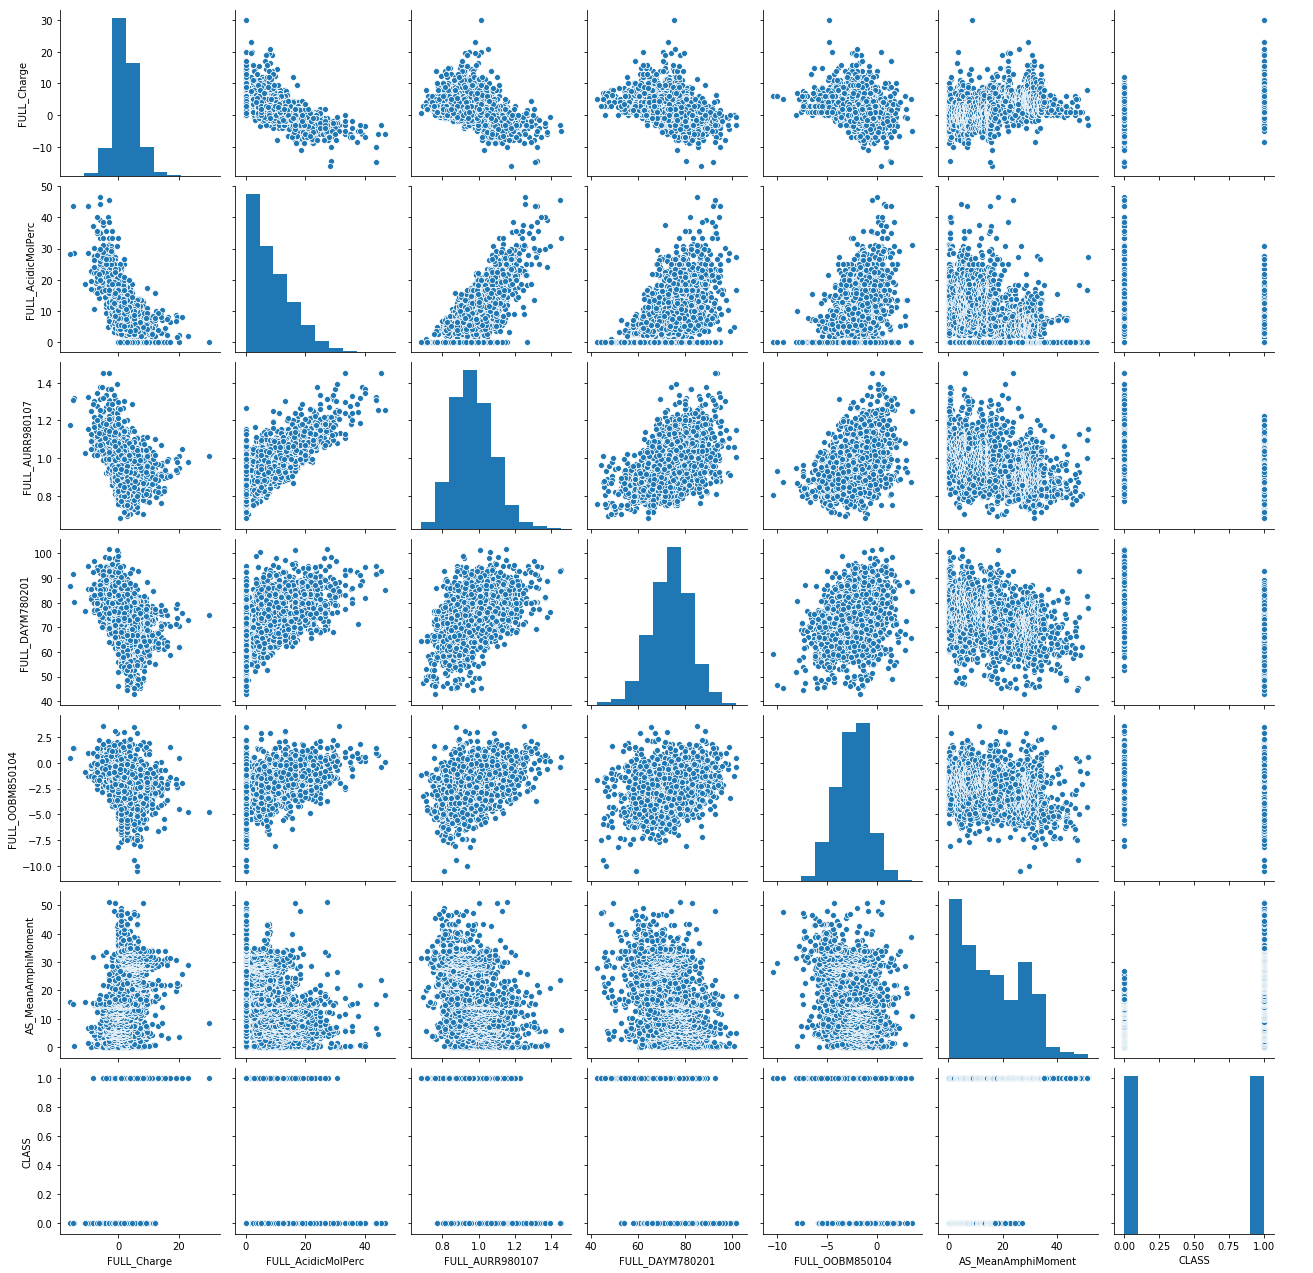

In [324]:
sb.pairplot(Impo)
pyplot.show()

In [325]:
# Multivariate plot

In [326]:
array= Impo.values# this is are the values of the dataset that will be used in the training
X= array[:,0:6]# so here we want all our columns to be included in the training and validation
y=array[:,6] # our training will be based on the last column which is in this case is the "variety" column (our class(as represented in WEKA ) or its our label)
X_train, X_validation, Y_train, Y_validation= train_test_split(X, y, test_size=0.2, random_state=2)# so here we now now spliting using the function (train_test_split),
#test size is the size of our validation which is 20% and 80% of the training, then the random _state to mantain the same values through out, if you remove it , your algorithm will be confused because its tested on dfferent

In [327]:
#testing all the models at once and taking tthe one with a higher mean and the lowest standard deviation
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RTC', RandomForestClassifier()))
models.append(('SGD',SGDClassifier()))
models.append(('NC', NearestCentroid()))
models.append(('MLPC',MLPClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=35, random_state=10, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean()*100, cv_results.std()))

LR: 90.821650 (0.032298)
LDA: 90.738835 (0.029101)
KNN: 91.032831 (0.030308)
CART: 89.545105 (0.040768)
NB: 91.358770 (0.032018)
SVM: 88.520556 (0.037568)
RTC: 93.164153 (0.028607)
SGD: 87.068323 (0.048889)
NC: 89.707187 (0.035969)


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPC: 91.976930 (0.027735)


In [328]:
#make predictions on the validated dataset
model=GaussianNB()
y=model.fit(X_train, Y_train)
predictions= model.predict(X_validation)

In [329]:
#evaluating predictions - comparion them to the expected results in the validation set, then calculate classificationn accuracy , as well as a confusion matrix and a classification report
#Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation,predictions))

0.899671052631579
[[268  41]
 [ 20 279]]
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       309
         1.0       0.87      0.93      0.90       299

    accuracy                           0.90       608
   macro avg       0.90      0.90      0.90       608
weighted avg       0.90      0.90      0.90       608



In [330]:
from sklearn.metrics import matthews_corrcoef as mcc
model.fit(X_validation,Y_validation)
mcc=mcc(model.predict(X_validation),Y_validation)
print("MCC:",mcc)

MCC: 0.8167448379369037


In [331]:
Test=pd.read_csv("../input/ace-class-assignment/Test.csv")
Test.head()

FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  FULL_DAYM780201  \
0          4.0               3.704            0.873           73.519   
1          4.0               4.444            0.892           62.444   
2          2.0               0.000            0.901           47.000   
3          4.5               0.000            0.869           69.222   
4         -4.0              21.591            1.061           71.682   

   FULL_GEOR030101  FULL_OOBM850104  NT_EFC195  AS_MeanAmphiMoment  \
0            0.987           -4.833          0               0.382   
1            0.931           -0.584          0               0.320   
2            1.039           -5.664          0               0.164   
3            0.982           -5.423          0               2.010   
4            0.976           -2.002          0               2.758   

   AS_DAYM780201  AS_FUKS010112  CT_RACS820104  
0         74.556          7.225          1.234  
1         56.056          4.942          1.853  
2         47.000          5.969          1.174  
3         69.222          5.462          1.138  
4         66.000          5.582          1.453

In [332]:
TestImpo=Test.drop([ 'FULL_GEOR030101', 'NT_EFC195', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104'],axis=1)
TestImpo# dropping the same features as we did to the train dataset so we keep consistency

FULL_Charge  FULL_AcidicMolPerc  FULL_AURR980107  FULL_DAYM780201  \
0            4.0               3.704            0.873           73.519   
1            4.0               4.444            0.892           62.444   
2            2.0               0.000            0.901           47.000   
3            4.5               0.000            0.869           69.222   
4           -4.0              21.591            1.061           71.682   
..           ...                 ...              ...              ...   
753         -1.5              16.000            1.100           82.820   
754         -1.0              18.182            1.085           73.455   
755         -1.0              19.048            1.108           82.190   
756         -1.0               7.143            0.955           76.786   
757         -7.0              17.143            1.078           84.186   

     FULL_OOBM850104  AS_MeanAmphiMoment  
0             -4.833               0.382  
1             -0.584               0.320  
2             -5.664               0.164  
3             -5.423               2.010  
4             -2.002               2.758  
..               ...                 ...  
753           -1.987              15.185  
754           -0.745              16.550  
755           -1.789              16.112  
756            1.141              20.630  
757           -0.066              17.168  

[758 rows x 6 columns]

In [333]:
#TestImpo=Test.drop(['FULL_AcidicMolPerc','FULL_DAYM780201','AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104'],axis=1)
#ImpoTest
Y=Impo.CLASS
X=Impo.drop("CLASS",axis=1)
OUTPUT=model.fit(X, Y).predict(TestImpo.values)
OUTPUT_1=pd.DataFrame(OUTPUT)
OUTPUT_1.columns=["CLASS"]
OUTPUT_1.index.name="Index"
OUTPUT_1["CLASS"]=OUTPUT_1["CLASS"].map({0.0:False,1.0:True})
OUTPUT_1.to_csv("imp.RC")
print(OUTPUT_1["CLASS"].unique())
print(OUTPUT_1["CLASS"].nunique())
print(OUTPUT_1.groupby("CLASS").size()[0].sum())
print(OUTPUT_1.groupby("CLASS").size()[1].sum())

[ True False]
2
367
391


So here i tested with MPLClassifier which gave me 79% , GaussianNB gave me 83% and RandomTreeeClassier gave me 80 % so hence i can say the GaussianNB has come out on top in all the ways i tried so i think its the right model for this type of problem , but am yet to do the Normalizing , Standarzing , Binarizing problem is , i havent got all the info how to , am still lacking on that part hence i ddint Normalize or Standadize my data.

# I think GaussianNB is the right model 

In [334]:
##########################min max scaler######################
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = TRAIN.values# rescaling my train dataset
# separate array into input and output components
X = array[:,0:11]
Y = array[:,11]
scaler = MinMaxScaler(feature_range=(0, 1))
TRAINrescaled = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=4)
print(TRAINrescaled[::])

[[0.4565 0.     0.3481 ... 0.5078 0.4149 0.1819]
 [0.4348 0.1158 0.322  ... 0.4213 0.5857 0.4748]
 [0.4674 0.1158 0.2464 ... 0.4416 0.2732 0.666 ]
 ...
 [0.3152 0.2679 0.5306 ... 0.6513 0.4593 0.2459]
 [0.3913 0.1071 0.2151 ... 0.529  0.4917 0.3447]
 [0.3261 0.3383 0.498  ... 0.4029 0.4523 0.2495]]


In [335]:
array = Test.values#rescaling my  test dataset
# separate array into input and output components
X = array[:,0:10]
Y = array[:,10]
scaler = MinMaxScaler(feature_range=(0, 1))
Testrescaled = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=4)
print(Testrescaled[::])

[[0.3953 0.084  0.2377 ... 0.0064 0.4927 0.9031]
 [0.3953 0.1007 0.2637 ... 0.0052 0.1619 0.2935]
 [0.3488 0.     0.276  ... 0.0021 0.     0.5677]
 ...
 [0.2791 0.4318 0.5587 ... 0.3208 0.5841 0.5856]
 [0.2791 0.1619 0.3497 ... 0.4111 0.5326 0.4876]
 [0.1395 0.3886 0.5178 ... 0.3419 0.5294 0.7597]]


In [336]:
#array= Impo.values# this is are the values of the dataset that will be used in the training
X= TRAINrescaled[:,0:11]# so here we want all our columns to be included in the training and validation
y=TRAINrescaled[:,-1] # our training will be based on the last column which is in this case is the "variety" column (our class(as represented in WEKA ) or its our label)
X_train, X_validation, Y_train, Y_validation= train_test_split(X, y, test_size=0.2, random_state=2)# so here we now now spliting using the function (train_test_split),
#test size is the size of our validation which is 20% and 80% of the training, then the random _state to mantain the same values through out, if you remove it , your algorithm will be confused because its tested on dfferent